In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import truncnorm
import scipy.integrate
import math


**Problem 1**

In [2]:
def p(data,theta): # function p
    return truncnorm.pdf(data, (-20 - theta) / 4, (20 - theta) / 4, loc=theta, scale=4)

In [3]:
def f(data,theta): # function f
    return (np.sin(5*(data-theta))**2) / (25*(np.sin(data-theta)**2))

In [4]:
def g(value, function): # function g
    return (function**value) * ((1-function)**(1-value))

In [5]:
def joint_x_g(data, value, theta): # joint probability of x and g, given theta  
    return g(value,f(data,theta))* p(data,theta)


Fraction of photons that get absorbed on avg_(a):  0.7999999285280941


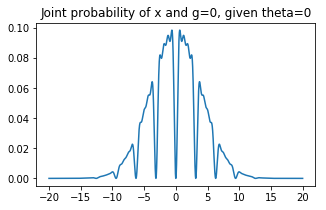

In [6]:
# (a) Numerical integration: Riemann Sums 
x = np.arange(-20,20,40/10000)

joint_x_g_zero = joint_x_g(x,0,0) # joint probability of x and g=0, given theta=0

fig = plt.figure(figsize=(5,3))
plt.plot(x,joint_x_g_zero)
plt.title('Joint probability of x and g=0, given theta=0')

print('Fraction of photons that get absorbed on avg_(a): ',np.sum(joint_x_g_zero)*40/10000)

plt.show()


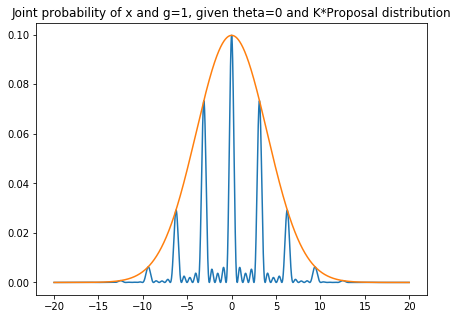

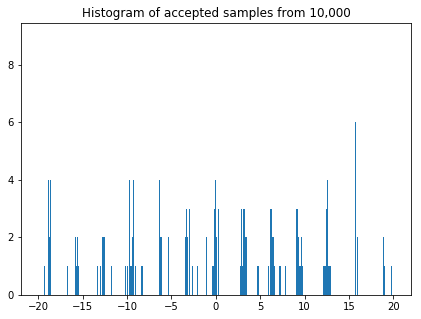

K value:  1.0
Fraction of accepted samples:  0.3671


In [7]:
# (b) Rejection sampler
joint_x_g_one = joint_x_g(x,1,0) # joint probability of x and g=1, given theta=0
k = np.max(joint_x_g_one/p(x,0)) 

samples = []

iteration = 10000
for i in range(iteration):
    z = np.random.normal(0, 4**2)
    u = np.random.uniform(0, k*p(z,0))

    if u <= joint_x_g(z,1,0): # Reject or accept
        samples.append(z)
        
accepted_samples = np.array(samples)

fig2 = plt.figure(figsize=(7,5))
plt.plot(x, joint_x_g_one)
plt.plot(x, k*p(x,0))
plt.title('Joint probability of x and g=1, given theta=0 and K*Proposal distribution')

fig3 = plt.figure(figsize=(7,5))
plt.hist(accepted_samples, bins=len(accepted_samples), range= [-20, 20])
plt.title('Histogram of accepted samples from 10,000')
plt.show()

print('K value: ',k)
print('Fraction of accepted samples: ',len(accepted_samples)/iteration)


In [8]:
# (c) Self-normalized importance sampler
data = np.random.choice(x, 1000, replace=False) # Get random 1000 points from x
fraction_of_absorbed_photon_c = np.mean(g(0,f(data,0)))
print('Fraction of photons that are absorbed (c): ',fraction_of_absorbed_photon_c)


Fraction of photons that are absorbed (c):  0.7800945842661151


In [9]:
# Functions for (d), (e), (f)
def prob_theta(theta): # prior
    return  1 / (10*np.pi*(1+(theta/10)**2))

In [10]:
# Functions for (d), (e), (f)
def joint_x_g_theta(x,g_value,theta): # joint probability of x, g and theta
    return prob_theta(theta) * p(x,theta) * (g(g_value,f(x,theta)))

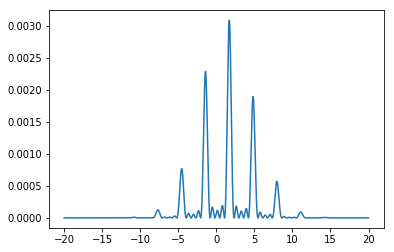

In [11]:
# (d) Joint probability of x=1.7, g=1 and theta
theta_d = np.linspace(start=-20, stop=20, num=10001)
x_d = 1.7

plt.plot(theta_d, joint_x_g_theta(x_d,1,theta_d))

Fraction of acceptance:  0.2766


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-20.65036621, -20.64112178, -20.63187734, ...,  13.26745848,
         13.27670292,  13.28594735]),
 <a list of 3671 Patch objects>)

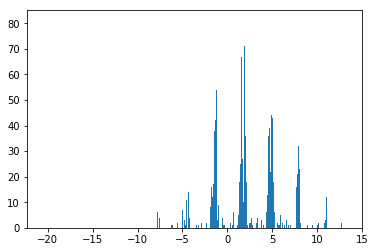

In [14]:
# (e) Metropolis-Hastings sampler
iters = 10000
samples = []
n_accept = 0
x_e = 1.7
# initialize current state and probability
theta_e = np.random.choice(theta_d, 1)
prob_x_e = joint_x_g_theta(x_e, 1,theta_e)

for i in range(iters):
    # make proposal move and probability
    proposal_theta = theta_e + 2* np.random.randn() # Propose move
    prop_prob_x_e = joint_x_g_theta(x_e, 1,proposal_theta)

    # compute acceptance probability
    p_accept = np.minimum(1., (prop_prob_x_e)/(prob_x_e))

    if np.random.rand() < p_accept:
        # accept
        theta_e = proposal_theta
        prob_x_e = prop_prob_x_e
        n_accept += 1

    samples.append(theta_e)

samples = np.array(samples)    

print('Fraction of acceptance: ', n_accept / iters)
plt.hist(samples,bins=len(accepted_samples))


Confidence, calibrated to within 3 degrees around zero:  0.5932


(array([2., 0., 0., ..., 0., 0., 2.]),
 array([-2.99742536, -2.99643161, -2.99543785, ...,  2.89554206,
         2.89653581,  2.89752957]),
 <a list of 1 Patch objects>)

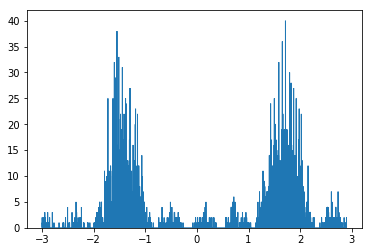

In [15]:
# (f) Posterior probability of samples from MH chain
new_samples = np.array([])

for i in range(len(samples)):
    if (samples[i]>-3) & (samples[i]<3):
        new_samples = np.concatenate([new_samples, samples[i]])
print('Confidence, calibrated to within 3 degrees around zero: ', len(new_samples)/len(samples))
plt.hist(new_samples, bins=len(new_samples), histtype= 'step')


In [ ]:
# # (f) Posterior probability of samples from MH chain
# f_samples = np.unique(samples) # Find non-overlapping samples

# new_samples = np.array([])

# for i in range(len(f_samples)):
#     if (f_samples[i]>-3) & (f_samples[i]<3):
#         new_samples = np.concatenate([new_samples, np.array([f_samples[i]])])
    

# numerator_f = joint_x_g_theta(1.7, 1, new_samples)
# denominator_f = np.sum(joint_x_g_theta(1.7, 1, f_samples))

# poster_pdf = numerator_f / denominator_f

# print('Confidence, calibrated to within 3 degrees around zero: ', np.sum(numerator_f)/denominator_f)

# plt.plot(new_samples, poster_pdf)



